# WE RATE DOGS - Data Wrangling

In this project, the twitter <a href="https://twitter.com/dog_rates">@dog_rates</a>, or better known as <a href="https://en.wikipedia.org/wiki/WeRateDogs">"WeRateDogs"</a>, will be analyzed. WeRateDogs is a Twitter account that rates people’s dogs with humorous comments. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because <a href="https://knowyourmeme.com/memes/theyre-good-dogs-brent">"they're good dogs Brent."</a> WeRateDogs has over 4 million followers and has received international media coverage. 

The objective of the project is not to leave a 100% functional database on dogs, but to show the code and techniques to gather, assess and clear the data.

In [5]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import os
import re

#Library to extract Twitter information
import tweepy

#Library to counting code processing time
from timeit import default_timer as timer

## Gather

In [6]:
#Convert the csv file to DataFrame
df_archive_enh = pd.read_csv("twitter-archive-enhanced.csv")

In [7]:
#Download the image_predictions file and read it
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open(url.split("/")[-1], mode = "wb") as file:
    file.write(response.content)

#Convert image_predictions file in a DataFrame
df_img_pred = pd.read_csv("image-predictions.tsv", sep = "\t")

In [ ]:
#In this cell everything related to the configuration about twitter API

#Keys from personal developer twitter
consumer_key    = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token    = 'HIDDEN'
access_secret   = 'HIDDEN'

#Checking keys to access Twitter data
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#API creation
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

#Access the ID of each tweet saved in the csv file
tweets_id = df_archive_enh["tweet_id"].values

#Get JSON data of the tweets ID through the twitter API
count = 0
id_error = {}
start = timer()

with open("tweet_json-txt", "w") as outfile:
    for tweet_id in tweets_id:
        count = count + 1
        print(str(count) + ": " + str(tweet_id))
        
        try:
            tweet = api.get_status(tweet_id, tweet_mode = "extended")
            print ("Success")
            json.dump(tweet._json, outfile)
            outfile.write("\n")
            
        except tweepy.TweepError as e:
            print("Fail")
            id_error[tweet_id] = e
            pass
               
end = timer()
print(end - start)
print(id_error)

In [8]:
#Read the tweet_json.txt and convert into a DataFrame
lst = list()
with open('tweet_json.txt', "r", encoding = "utf-8") as json_file:
    for line in json_file:
        status = json.loads(line)
        lst.append({"tweet_id": status["id"],
                    "retweet_count": status["retweet_count"],
                    "favorite_count": status["favorite_count"]
                     })
    
    
df_tweet_json = pd.DataFrame(lst, columns = ["tweet_id", "retweet_count", "favorite_count"]) 

 ## Assess

### Visual assessment

In [9]:
df_archive_enh

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
df_img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
df_tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7360,35021
1,892177421306343426,5487,30333
2,891815181378084864,3628,22803
3,891689557279858688,7541,38302
4,891327558926688256,8127,36571
...,...,...,...
2326,666049248165822465,38,93
2327,666044226329800704,122,259
2328,666033412701032449,39,107
2329,666029285002620928,41,118


### Programattic assessment

#### a) About df_archive_enh

In [12]:
#Show information about the DataFrame
df_archive_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
#Stadistic information about the DataFrame
df_archive_enh.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tweet_id,2356.0,7.427716e+17,6.856705e+16,6.660209e+17,6.783989e+17,7.196279e+17,7.993373e+17,8.924206e+17
in_reply_to_status_id,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
retweeted_status_id,181.0,7.720400e+17,6.236928e+16,6.661041e+17,7.186315e+17,7.804657e+17,8.203146e+17,8.874740e+17
retweeted_status_user_id,181.0,1.241698e+16,9.599254e+16,7.832140e+05,4.196984e+09,4.196984e+09,4.196984e+09,7.874618e+17
rating_numerator,2356.0,1.312649e+01,4.587665e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2356.0,1.045543e+01,6.745237e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02


In [14]:
#Check for duplicate information
sum(df_archive_enh.duplicated())

0

In [15]:
#Check for Nan data in "tweet_id" column
sum(df_archive_enh["tweet_id"].isnull())

0

In [16]:
#Check for values in "in_reply_to_status_id" column
sum(df_archive_enh["in_reply_to_status_id"].isnull())

2278

In [17]:
#Check for values in "in_reply_to_user_id" column
sum(df_archive_enh["in_reply_to_user_id"].isnull())

2278

In [18]:
#Show how this column isn't human readable
pd.set_option('display.max_colwidth', 300)
df_archive_enh.loc[:, "source"]

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

In [19]:
#See if the "text" column has something interesting to fix
pd.set_option('display.max_colwidth', 200)
df_archive_enh.loc[:, "text"].sample(10)

1331                                                            "Ma'am, for the last time, I'm not authorized to make that type of transaction" 11/10 https://t.co/nPTBsdm3BF
1395                                                   This is Cooper. He began to tear up when his bone was taken from him. 11/10 stay strong pupper https://t.co/qI8yvqKG02
1208                                                                   This is Bentley. He gives kisses back. 11/10 precious af (vid by @emmaallen25) https://t.co/9PnKkKzoUp
213      Oh jeez u did me quite the spook little fella. We normally don't rate triceratops but this one seems suspiciously good. 11/10 would pet well https://t.co/BMtfCmNbnS
344     This is Miguel. He was the only remaining doggo at the adoption center after the weekend. Let's change that. 12/10\n\nhttps://t.co/P0bO8mCQwN https://t.co/SU4K34NT4M
856                                      This is Kota and her son Benedict. She doesn't know why you're staring. They are a normal

In [20]:
#Although the information about whether a row is a retweet or not is already possible to see in the .info()
#you can check to be sure
sum(df_archive_enh["retweeted_status_id"].isnull())

2175

In [21]:
#Checking the diferents values of "retweeted_status_id" column, and how they should be
df_archive_enh["retweeted_status_id"].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
               ..
7.848260e+17    1
7.806013e+17    1
8.305833e+17    1
7.047611e+17    1
7.331095e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [22]:
#Check "source" column values
df_archive_enh["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [23]:
len(df_archive_enh[df_archive_enh["rating_numerator"] > 10])

1455

In [24]:
df_archive_enh[df_archive_enh["rating_numerator"] == df_archive_enh["rating_numerator"].max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [25]:
df_archive_enh["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [26]:
df_archive_enh["name"].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
            ... 
Rontu          1
Vince          1
Sojourner      1
Chubbs         1
Blipson        1
Name: name, Length: 957, dtype: int64

In [27]:
#Number of records whose both doggo and floofer columns are not None
len(df_archive_enh[(df_archive_enh["doggo"] != "None") & (df_archive_enh["floofer"] != "None")])

1

In [28]:
#Number of records whose both doggo and floofer columns are not None
len(df_archive_enh[(df_archive_enh["doggo"] != "None") & (df_archive_enh["pupper"] != "None")])

12

In [29]:
#Number of records whose both doggo and floofer columns are not None
len(df_archive_enh[(df_archive_enh["doggo"] != "None") & (df_archive_enh["puppo"] != "None")])

1

In [30]:
#Number of records whose both doggo and floofer columns are not None
len(df_archive_enh[(df_archive_enh["floofer"] != "None") & (df_archive_enh["pupper"] != "None")])

0

In [31]:
#Number of records whose both doggo and floofer columns are not None
len(df_archive_enh[(df_archive_enh["floofer"] != "None") & (df_archive_enh["pupper"] != "None")])

0

In [32]:
#Number of records whose both doggo and floofer columns are not None
len(df_archive_enh[(df_archive_enh["puppo"] != "None") & (df_archive_enh["pupper"] != "None")])

0

### Quality

####  `df_archive_enh` table
- Tweet_id column has a wrong format (should be a str, it is an identification, no calculations are made with it
- Nan values in “in_reply_to_status_id" and "in_reply_to_user_id" columns. Wrong datatype
- “source” column isn’t human readable
- Retweets data should be removed from the dataframe
- The denominators will be arranged following the criterion of what it says in the column "text".
- Some dog names don't make sense
- Some dog ages have multiple options
- Some columns are not in use

### Tidiness

- Dog ages are in separate columns, when they should be in one column only.
- Separate dataframes 

## Cleaning Data

In [33]:
#A copy of the original file is made for data cleansing, leaving the original file intact in case of problems.
df_clean_arch = df_archive_enh.copy()

### *Quality data* (first part)

### 1) Define

"tweet_id" column is a identification, it should change to str format.

### 1) Code

In [34]:
df_clean_arch["tweet_id"] = df_clean_arch["tweet_id"].astype(str)

### 1) Test

In [35]:
df_clean_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2) Define

- Replace the datatype in "in_reply_to_status_id" and "in_reply_to_user_id" columns
- Replace the NaN values in "in_reply_to_status_id" and "in_reply_to_user_id" columns with a "False" statement

### 2) Code

In [36]:
df_clean_arch["in_reply_to_status_id"] = df_clean_arch["in_reply_to_status_id"].astype(str)
df_clean_arch["in_reply_to_status_id"] = df_clean_arch["in_reply_to_status_id"].replace("nan", "False")

In [37]:
df_clean_arch["in_reply_to_user_id"] = df_clean_arch["in_reply_to_user_id"].astype(str)
df_clean_arch["in_reply_to_user_id"] = df_clean_arch["in_reply_to_user_id"].replace("nan", "False")

### 2) Test

In [38]:
df_clean_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         2356 non-null   object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [39]:
df_clean_arch["in_reply_to_status_id"].value_counts()

False                    2278
6.671521640794235e+17       2
8.018543306724475e+17       1
8.381454986911949e+17       1
6.827884415375606e+17       1
                         ... 
8.862663570751283e+17       1
6.936422321512858e+17       1
8.503288187788206e+17       1
6.935722159383675e+17       1
7.476486538174136e+17       1
Name: in_reply_to_status_id, Length: 78, dtype: int64

In [40]:
df_clean_arch["in_reply_to_user_id"].value_counts()

False                    2278
4196983835.0               47
21955058.0                  2
8.405478643549184e+17       1
29166305.0                  1
3105440746.0                1
47384430.0                  1
16487760.0                  1
194351775.0                 1
279280991.0                 1
11856342.0                  1
467036706.0                 1
358972768.0                 1
2319108198.0                1
16374678.0                  1
77596200.0                  1
13615722.0                  1
1198988510.0                1
1582853809.0                1
21435658.0                  1
113211856.0                 1
28785486.0                  1
4717297476.0                1
30582082.0                  1
15846407.0                  1
291859009.0                 1
26259576.0                  1
2281181600.0                1
7.305050141505823e+17       1
180670967.0                 1
20683724.0                  1
2894131180.0                1
Name: in_reply_to_user_id, dtype: int64

### 3) Define

Extract unnecessary tags from the url's in the "source" column.

### 3) Code

In [41]:
df_clean_arch["source"] = df_clean_arch["source"].str.replace(r"<(?:a\b[^>]*>|/a>)", " ") 

### 3) Test

In [42]:
df_clean_arch["source"].value_counts()

 Twitter for iPhone      2221
 Vine - Make a Scene       91
 Twitter Web Client        33
 TweetDeck                 11
Name: source, dtype: int64

### 4) Define

Remove from DataFrame the evaluations that correspond to retweets

### 4) Code

In [43]:
df_clean_arch = df_clean_arch[df_clean_arch["retweeted_status_id"].isnull()]

### 4) Test

In [44]:
df_clean_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       2175 non-null   object 
 2   in_reply_to_user_id         2175 non-null   object 
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### 5) Define

Arrange the largest amount of data in column "rating_numerator" according to column "text".

### 5) Code

In [45]:
df_clean_arch.loc[df_clean_arch["rating_denominator"] != 10, ["tweet_id","text","rating_numerator","rating_denominator"]]

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90


In [46]:
df_clean_arch[df_clean_arch["text"].str.contains(r"(\d+\.\d*\/\d+)")][["tweet_id","text","rating_numerator","rating_denominator"]]

C:\Users\fgodo\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [47]:
df_clean_arch[df_clean_arch["rating_numerator"] == df_clean_arch["rating_numerator"].max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,False,False,2016-07-04 15:00:45 +0000,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,None,None,None,None


In [48]:
df_clean_arch.loc[df_clean_arch["tweet_id"] == "835246439529840640", ["rating_numerator","rating_denominator"]] = [13,10]
df_clean_arch.loc[df_clean_arch["tweet_id"] == "740373189193256964", ["rating_numerator","rating_denominator"]] = [14, 10]
df_clean_arch.loc[df_clean_arch["tweet_id"] == "722974582966214656", ["rating_numerator","rating_denominator"]] = [13,10]
df_clean_arch.loc[df_clean_arch["tweet_id"] == "716439118184652801", ["rating_numerator","rating_denominator"]] = [11,10]
df_clean_arch.loc[df_clean_arch["tweet_id"] == "710658690886586372", ["rating_numerator","rating_denominator"]] = [10,10]
df_clean_arch.loc[df_clean_arch["tweet_id"] == "682962037429899265", ["rating_numerator","rating_denominator"]] = [10,10]
df_clean_arch.loc[df_clean_arch["tweet_id"] == "666287406224695296", ["rating_numerator","rating_denominator"]] = [9,10]
df_clean_arch.loc[df_clean_arch["tweet_id"] == "883482846933004288", ["rating_numerator","rating_denominator"]] = [13.5,10]
df_clean_arch.loc[df_clean_arch["tweet_id"] == "786709082849828864", ["rating_numerator","rating_denominator"]] = [9.75,10]
df_clean_arch.loc[df_clean_arch["tweet_id"] == "778027034220126208", ["rating_numerator","rating_denominator"]] = [11.27,10]
df_clean_arch.loc[df_clean_arch["tweet_id"] == "681340665377193984", ["rating_numerator","rating_denominator"]] = [9.5,10]
df_clean_arch.loc[df_clean_arch["tweet_id"] == "680494726643068929", ["rating_numerator","rating_denominator"]] = [11.26,10]
df_clean_arch.loc[df_clean_arch["tweet_id"] == "749981277374128128", ["rating_numerator","rating_denominator"]] = [10,10]

### 5) Test


In [49]:
df_clean_arch.loc[df_clean_arch["tweet_id"] == "835246439529840640"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.35245984028504e+17,26259576.0,2017-02-24 21:54:03 +0000,Twitter for iPhone,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,13.0,10,None,None,None,None,None


### 6) Define

Change those dog names that do not make sense, and "None" values

### 6) Code

In [50]:
df_clean_arch["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [51]:
df_clean_arch[df_clean_arch["name"].str.islower() == True]["name"].value_counts()

a               55
the              8
an               6
very             4
one              4
just             3
quite            3
actually         2
not              2
getting          2
light            1
space            1
old              1
unacceptable     1
by               1
officially       1
life             1
infuriating      1
his              1
my               1
such             1
all              1
mad              1
incredibly       1
this             1
Name: name, dtype: int64

In [52]:
for word in df_clean_arch["name"]:
    if word.islower() == True:
        df_clean_arch["name"] = df_clean_arch["name"].replace(word, "No name available")

In [53]:
df_clean_arch["name"] = df_clean_arch["name"].replace("None", "No name available")

### 6) Test

In [54]:
df_clean_arch[df_clean_arch["name"] == "No name available"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,False,False,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,No name available,None,None,None,None
7,890729181411237888,False,False,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10,No name available,None,None,None,None
12,889665388333682689,False,False,2017-07-25 01:55:32 +0000,Twitter for iPhone,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13.0,10,No name available,None,None,None,puppo
22,887517139158093824,False,False,2017-07-19 03:39:09 +0000,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14.0,10,No name available,None,None,None,None
24,887343217045368832,False,False,2017-07-18 16:08:03 +0000,Twitter for iPhone,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13.0,10,No name available,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,False,False,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,No name available,None,None,None,None
2352,666044226329800704,False,False,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,No name available,None,None,None,None
2353,666033412701032449,False,False,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,No name available,None,None,None,None
2354,666029285002620928,False,False,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10,No name available,None,None,None,None


In [55]:
df_clean_arch["name"].value_counts()

No name available    784
Charlie               11
Lucy                  11
Oliver                10
Cooper                10
                    ... 
Tilly                  1
Scruffers              1
Lilli                  1
Spencer                1
Robin                  1
Name: name, Length: 931, dtype: int64

### *Tidiness* 

### 1) Define

Unify dog ages in a single column

### 1) Code

In [56]:
df_clean_arch[["doggo", "floofer", "pupper", "puppo"]] = df_clean_arch[["doggo", "floofer", "pupper", "puppo"]].replace("None", "")

In [57]:
df_clean_arch["dog_status"] = df_clean_arch["doggo"] + df_clean_arch["floofer"] + df_clean_arch["pupper"] + df_clean_arch["puppo"]

### 1) Test

In [58]:
df_clean_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_status
103,872486979161796608,False,False,2017-06-07 16:14:40 +0000,Twitter for iPhone,We. Only. Rate. Dogs. Do not send in other things like this fluffy floor shark clearly ready to attack. Get it together guys... 12/10 https://t.co/BZHiKx3FpQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872486979161796608/photo/1,12.0,10,No name available,,,,,
1569,687807801670897665,False,False,2016-01-15 01:25:33 +0000,Twitter for iPhone,Meet Trooper &amp; Maya. Trooper protects Maya from bad things like dognappers and Comcast. So touching. 11/10 for both https://t.co/c98k1IoZKy,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687807801670897665/photo/1,11.0,10,Trooper,,,,,
953,751830394383790080,False,False,2016-07-09 17:28:29 +0000,Twitter for iPhone,This is Tucker. He's very camera shy. 12/10 would give stellar belly rubs to https://t.co/BJRsxuLF1w,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/751830394383790080/photo/1,https://twitter.com/dog_rates/status/751830394383790080/photo/1,https://twitter.com/dog_rates/status/751830394383790080/photo/1",12.0,10,Tucker,,,,,
276,840632337062862849,False,False,2017-03-11 18:35:42 +0000,Twitter for iPhone,Say hello to Maddie and Gunner. They are considerably pupset about bath time. Both 12/10 but Gunner needs your help\n\nhttps://t.co/JesYTzb1Jo https://t.co/5cncH08G1o,NaN,NaN,NaN,"https://www.gofundme.com/3hgsuu0,https://twitter.com/dog_rates/status/840632337062862849/photo/1",12.0,10,Maddie,,,,,
1261,710153181850935296,False,False,2016-03-16 17:18:07 +0000,Twitter for iPhone,This is Lacy. She's tipping her hat to you. Daydreams of her life back on the frontier. 11/10 would pet so well https://t.co/fG5Pk3Et1I,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/710153181850935296/photo/1,https://twitter.com/dog_rates/status/710153181850935296/photo/1",11.0,10,Lacy,,,,,
1658,683111407806746624,False,False,2016-01-02 02:23:45 +0000,Twitter for iPhone,This is Larry. He thought the New Year's parties were tonight. 10/10 poor pupper. Maybe next year https://t.co/h3X0jK8MVM,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683111407806746624/photo/1,10.0,10,Larry,,,pupper,,pupper
1416,698635131305795584,False,False,2016-02-13 22:29:29 +0000,Twitter for iPhone,Here we are witnessing five Guatemalan Birch Floofs in their natural habitat. All 12/10 (Vid by @pootdanielle) https://t.co/rb8nzVNh7F,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698635131305795584/video/1,12.0,10,No name available,,,,,
134,866686824827068416,False,False,2017-05-22 16:06:55 +0000,Twitter for iPhone,This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/866686824827068416/photo/1,https://twitter.com/dog_rates/status/866686824827068416/photo/1",12.0,10,Lili,,,,,
1361,703079050210877440,False,False,2016-02-26 04:48:02 +0000,Twitter for iPhone,This is a Butternut Cumberfloof. It's not windy they just look like that. 11/10 back at it again with the red socks https://t.co/hMjzhdUHaW,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/703079050210877440/photo/1,https://twitter.com/dog_rates/status/703079050210877440/photo/1",11.0,10,No name available,,,,,
1979,672980819271634944,False,False,2015-12-05 03:28:25 +0000,Twitter for iPhone,Extraordinary dog here. Looks large. Just a head. No body. Rather intrusive. 5/10 would still pet https://t.co/ufHWUFA9Pu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672980819271634944/photo/1,5.0,10,No name available,,,,,


In [59]:
df_clean_arch["dog_status"].value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_status, dtype: int64

In [60]:
df_clean_arch[df_clean_arch["dog_status"] == ""].count()

tweet_id                      1831
in_reply_to_status_id         1831
in_reply_to_user_id           1831
timestamp                     1831
source                        1831
text                          1831
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 1779
rating_numerator              1831
rating_denominator            1831
name                          1831
doggo                         1831
floofer                       1831
pupper                        1831
puppo                         1831
dog_status                    1831
dtype: int64

### 2) Define

Combine all DataFrames into one main DataFrame

### 2) Code

In [61]:
df_img_pred["tweet_id"] = df_img_pred["tweet_id"].astype(str)
df_main = pd.merge(df_clean_arch, df_img_pred, on="tweet_id", how="inner")

In [62]:
df_tweet_json["tweet_id"] = df_tweet_json["tweet_id"].astype(str)
df_main = pd.merge(df_main, df_tweet_json, on="tweet_id", how="inner")

### 2) Test 

In [63]:
df_main.head()
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1987 non-null   object 
 1   in_reply_to_status_id       1987 non-null   object 
 2   in_reply_to_user_id         1987 non-null   object 
 3   timestamp                   1987 non-null   object 
 4   source                      1987 non-null   object 
 5   text                        1987 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1987 non-null   object 
 10  rating_numerator            1987 non-null   float64
 11  rating_denominator          1987 non-null   int64  
 12  name                        1987 non-null   object 
 13  doggo                       1987 

### Quality data (second part)

### 7) Define

Change combined names in "dog_status" columns with a "multiple" option

### 7) Code

In [64]:
df_main["dog_status"] = df_main["dog_status"].replace("doggopupper", "multiple")
df_main["dog_status"] = df_main["dog_status"].replace("doggopuppo", "multiple")
df_main["dog_status"] = df_main["dog_status"].replace("doggofloofer", "multiple")


### 7) Test

In [65]:
df_main["dog_status"].value_counts()

            1682
pupper       203
doggo         62
puppo         22
multiple      11
floofer        7
Name: dog_status, dtype: int64

### 8) Define

Eliminate columns that are of no use ("retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "doggo", "floofer", "pupper", "puppo")

### 8) Code

In [66]:
df_main.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "doggo", "floofer", "pupper", "puppo"], axis=1, inplace = True)

### 8) Test

In [67]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1987 non-null   object 
 1   in_reply_to_status_id  1987 non-null   object 
 2   in_reply_to_user_id    1987 non-null   object 
 3   timestamp              1987 non-null   object 
 4   source                 1987 non-null   object 
 5   text                   1987 non-null   object 
 6   expanded_urls          1987 non-null   object 
 7   rating_numerator       1987 non-null   float64
 8   rating_denominator     1987 non-null   int64  
 9   name                   1987 non-null   object 
 10  dog_status             1987 non-null   object 
 11  jpg_url                1987 non-null   object 
 12  img_num                1987 non-null   int64  
 13  p1                     1987 non-null   object 
 14  p1_conf                1987 non-null   float64
 15  p1_d

In [68]:
df_main["timestamp"] = pd.to_datetime(df_main["timestamp"])

## Store Data

In [69]:
df_main.to_csv("twitter_archive_master.csv", encoding='utf-8', index=False)

## Insights and visualizations

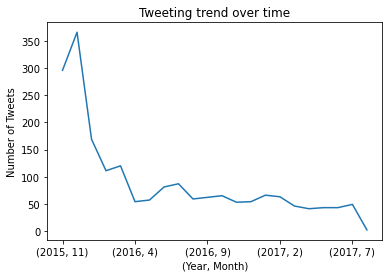

In [70]:
data = df_main["tweet_id"].groupby([df_main["timestamp"].dt.year, df_main["timestamp"].dt.month]).count()
ax = data.plot(kind = "line", title = "Tweeting trend over time")
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets");

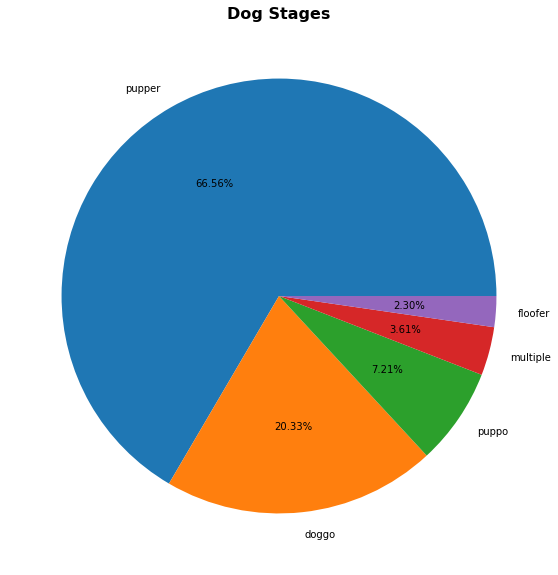

In [71]:
dogs = df_main[(df_main["dog_status"] == "pupper") | (df_main["dog_status"] == "doggo") | (df_main["dog_status"] == "puppo") | (df_main["dog_status"] == "multiple") | (df_main["dog_status"] == "floofer")]  
dogs["dog_status"].value_counts().plot(kind ="pie",autopct='%.2f%%', figsize=(10,10))
plt.ylabel('')
plt.title('Dog Stages', weight='bold', fontsize=16);


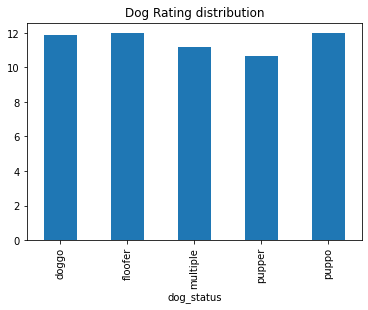

In [72]:
avg_rating = dogs.groupby("dog_status")["rating_numerator"].mean()
avg_rating.plot(kind = "bar", title = "Dog Rating distribution");

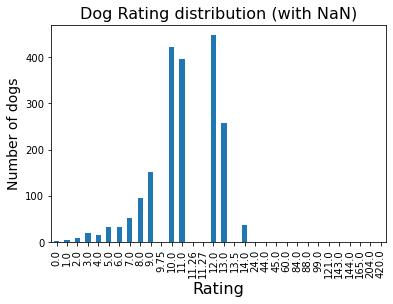

In [73]:
distr = df_main["rating_numerator"].value_counts().sort_index()
distr.plot(kind = "bar")
plt.title("Dog Rating distribution (with NaN)",fontsize = 16)
plt.xlabel("Rating", fontsize = 16)
plt.ylabel('Number of dogs', fontsize = 14);

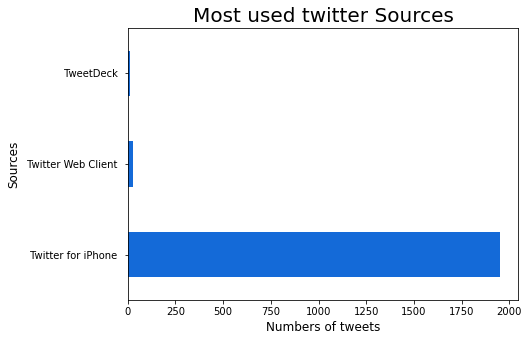

In [74]:
df_main["source"].value_counts().plot(kind="barh",figsize=(7,5), color="#146AD8", legend=None )
plt.title("Most used twitter Sources",fontsize = 20)
plt.ylabel("Sources", fontsize = 12)
plt.xlabel('Numbers of tweets', fontsize = 12);

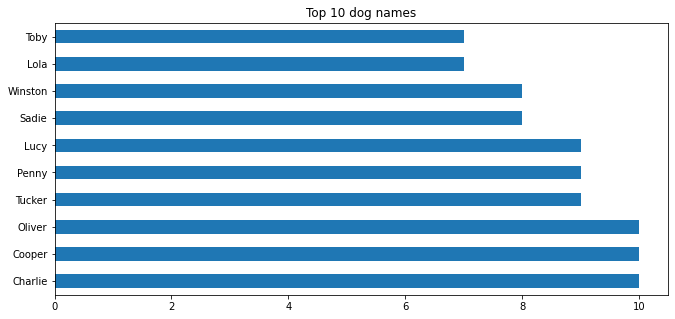

In [75]:
df_main[(df_main["name"] != "No name available")]["name"].value_counts()[:10].plot(kind = "barh", figsize=(11,5), title = "Top 10 dog names");